In [16]:
import pandas as pd

file_path = "/content/sentimentdataset.csv"

# Try loading with different encoding options
try:
    df = pd.read_csv(file_path, encoding="utf-8")  # Default encoding
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding="ISO-8859-1")  # Alternative encoding

# Display dataset structure
print(df.info())  # Show dataset summary
print(df.head())  # Display first few rows
print("Column Names:", df.columns)  # List column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2  

Column Names: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')
Using 'Text' as the text column.
Sentiment
Neutral     325
Positive    283
Negative    124
Name: count, dtype: int64


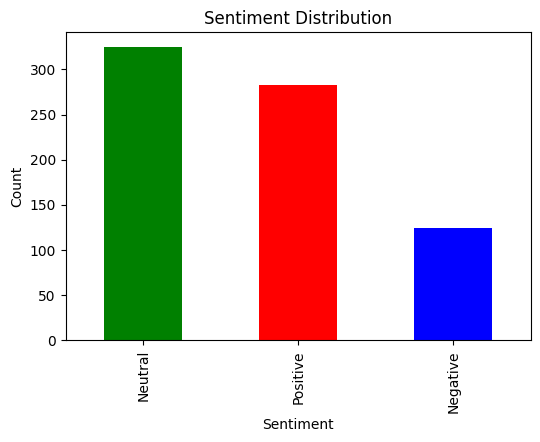

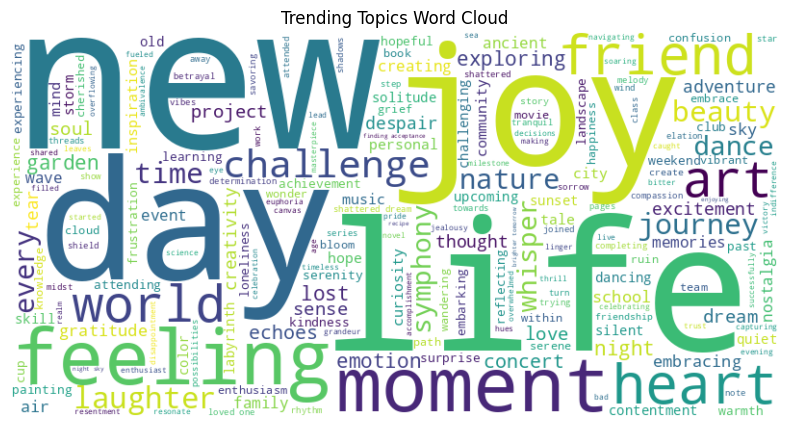

In [18]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

# Load dataset
file_path = "/content/sentimentdataset.csv"

# Try loading the dataset with different encodings
try:
    df = pd.read_csv(file_path, encoding="utf-8")
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display column names
print("Column Names:", df.columns)

# Automatically detect the text column
text_columns = [col for col in df.columns if df[col].dtype == 'object']  # Get text-based columns
if not text_columns:
    raise ValueError("No text-based column found in the dataset.")

text_col = text_columns[0]  # Assume first text-based column is the relevant one
print(f"Using '{text_col}' as the text column.")

# Data Cleaning Function
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Remove special characters
    return text

df['cleaned_text'] = df[text_col].apply(clean_text)

# Sentiment Analysis Function
def get_sentiment(text):
    analysis = TextBlob(text)
    return 'Positive' if analysis.sentiment.polarity > 0 else ('Negative' if analysis.sentiment.polarity < 0 else 'Neutral')

df['Sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Display sentiment distribution
print(df['Sentiment'].value_counts())

# Visualization - Sentiment Distribution
plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Word Cloud for Trending Topics
all_words = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Trending Topics Word Cloud")
plt.show()
